# Model Audit Pipeline: Explainability
## Dataset: Prosper Loan Data

In this notebook, we apply explainability techniques to the previously trained models:
- Logistic Regression
- Random Forest
- XGBoost

Audits will include:
1. Global explainability (SHAP summary)
2. Local explainability (SHAP individual predictions)
3. Feature importance analysis


## Load data and models

In [7]:
import sys
import os

# Add the project root to the Python path
sys.path.append(os.path.abspath('..'))

import pandas as pd
import shap
from audit_tool import explainability as exp
import joblib

# Load test data
X_test = pd.read_csv('../data/processed/prosperloan/X_test.csv')
X_test_unscaled = pd.read_csv('../data/processed/prosperloan/X_test_unscaled.csv')
# VERY IMPORTANT: Force numeric dtype
X_test = X_test.astype(float)

# Load train data
X_train = pd.read_csv('../data/processed/prosperloan/X_train.csv')

# Load models
log_model = joblib.load('../models/prosperloan/logistic_regression.pkl')
rf_model = joblib.load('../models/prosperloan/random_forest.pkl')
xgb_model = joblib.load('../models/prosperloan/xgboost.pkl')

print("Data and models loaded successfully.")


Data and models loaded successfully.


## SHAP Global Explainability 
### XGBoost 

100%|===================| 22639/22648 [03:25<00:00]        

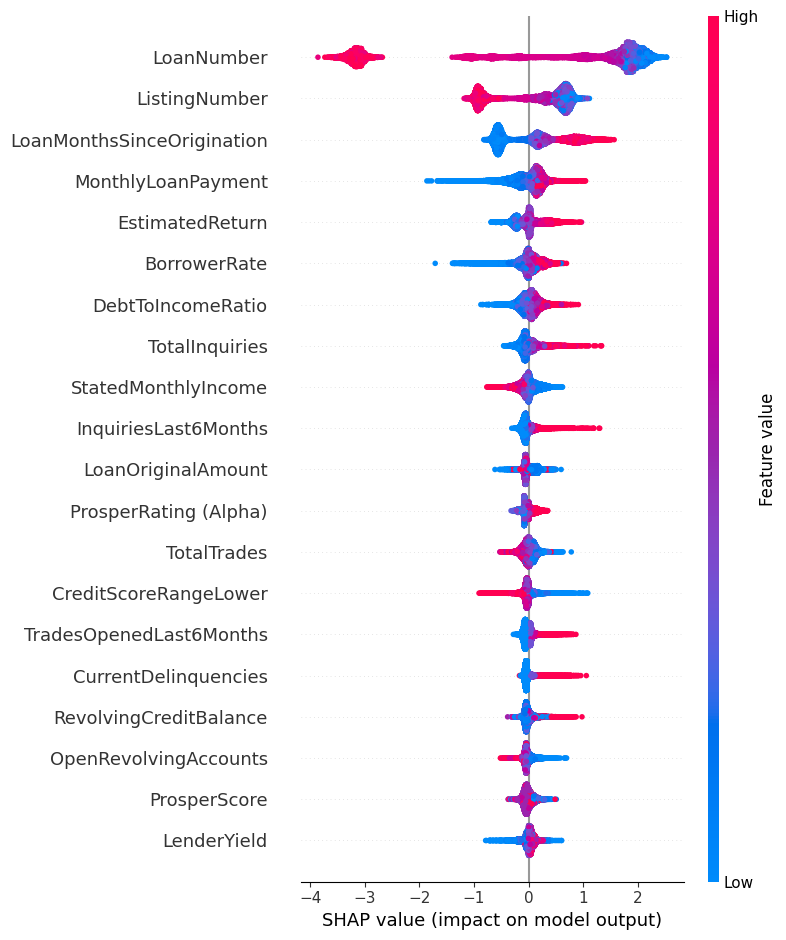

In [8]:
# Compute SHAP values
shap_values = exp.compute_shap_values(xgb_model, X_test)

# Summary plot
exp.plot_shap_summary(shap_values, X_test, max_display=20)


### Logistic Regression

For the logistic regression model, we use the unscaled test set to retain feature interpretability.


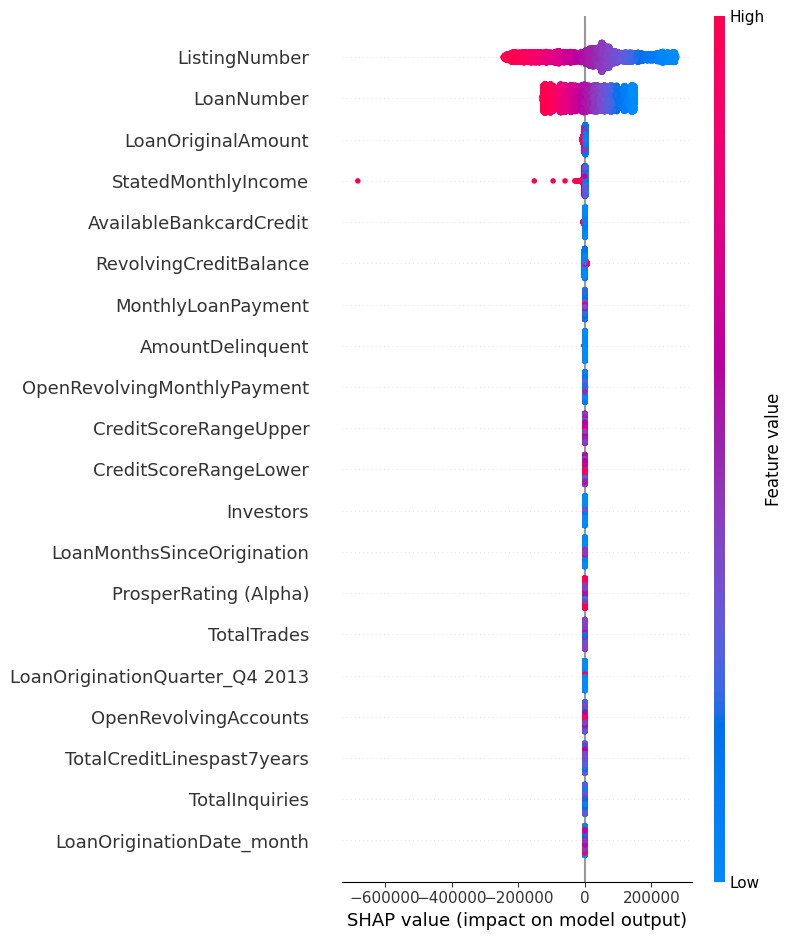

In [9]:
# Reload unscaled X_test
X_test_unscaled = pd.read_csv('../data/processed/prosperloan/X_test_unscaled.csv')

# SHAP for Logistic Regression
log_shap_values = exp.compute_shap_values(log_model, X_test_unscaled)
exp.plot_shap_summary(log_shap_values, X_test_unscaled)

### Random Forest

We now compute SHAP values for the Random Forest model to assess feature importance and overall behavior.


In [10]:
# SHAP for Random Forest
#rf_shap_values = exp.compute_shap_values(rf_model, X_test)
#exp.plot_shap_summary(rf_shap_values, X_test)

## Feature Importances for Random Forest

To complement the SHAP analysis, we also review the built-in feature importances from the Random Forest model.

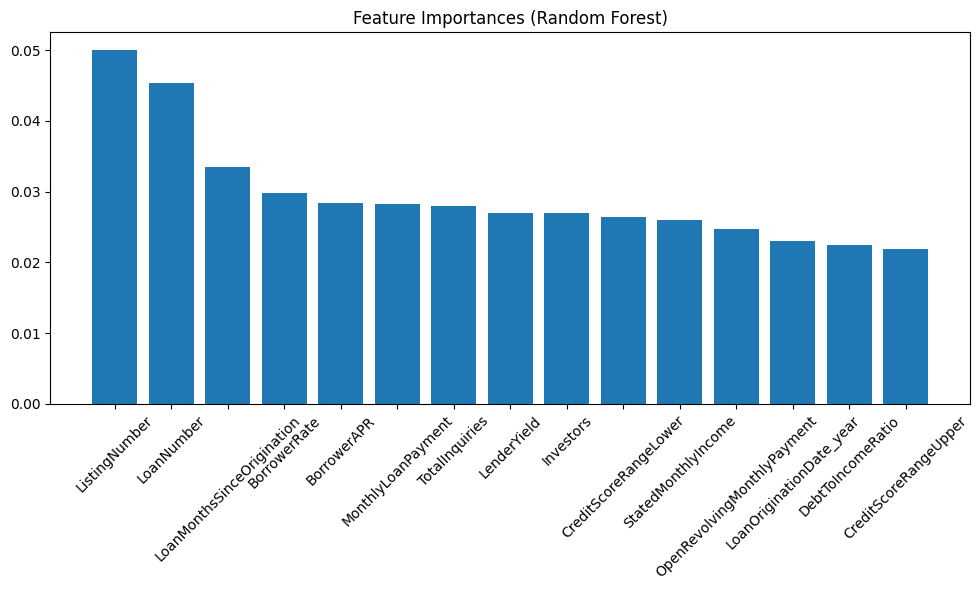

In [11]:
exp.plot_rf_feature_importance(rf_model, X_test.columns, top_n=15)

## Local Explainability: SHAP Waterfall

To understand the model's decision for individual cases, we use SHAP waterfall plots.
This allows us to see how each feature contributed to the prediction for a specific instance.

We will now plot the SHAP values for a selected instance from the test set.


### XGBoost

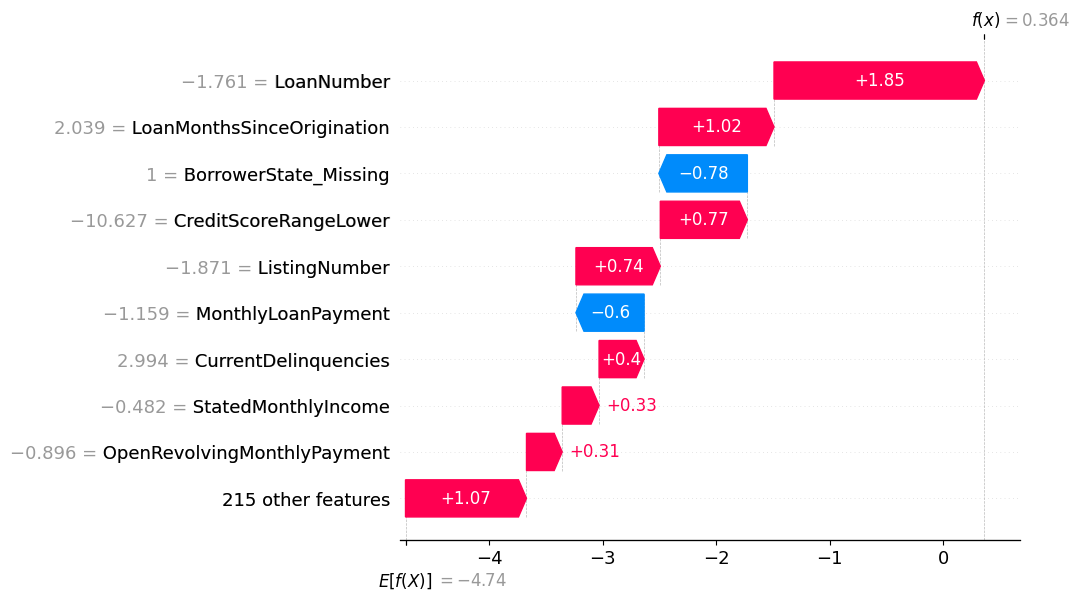

In [12]:
# Select an instance index to explain
instance_idx = 10  # You can change this number to explore other instances

# XGBoost
exp.plot_shap_waterfall(shap_values, instance_idx)

### Logistic Regression

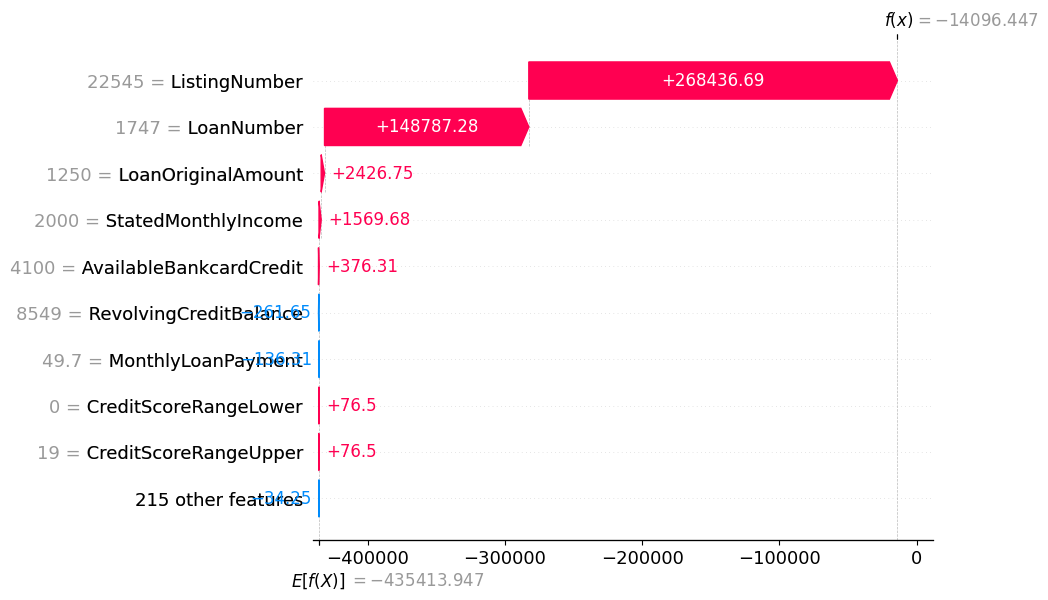

In [13]:
# Logistic Regression
exp.plot_shap_waterfall(log_shap_values, instance_idx)

### Random Forest

In [14]:
# Random Forest
exp.plot_shap_waterfall(rf_shap_values, instance_idx)

NameError: name 'rf_shap_values' is not defined

## Global Feature Importance: Random Forest

To complement SHAP results, we also compute the traditional feature importance 
from the Random Forest model. This gives another perspective of which variables
the model relied on the most.


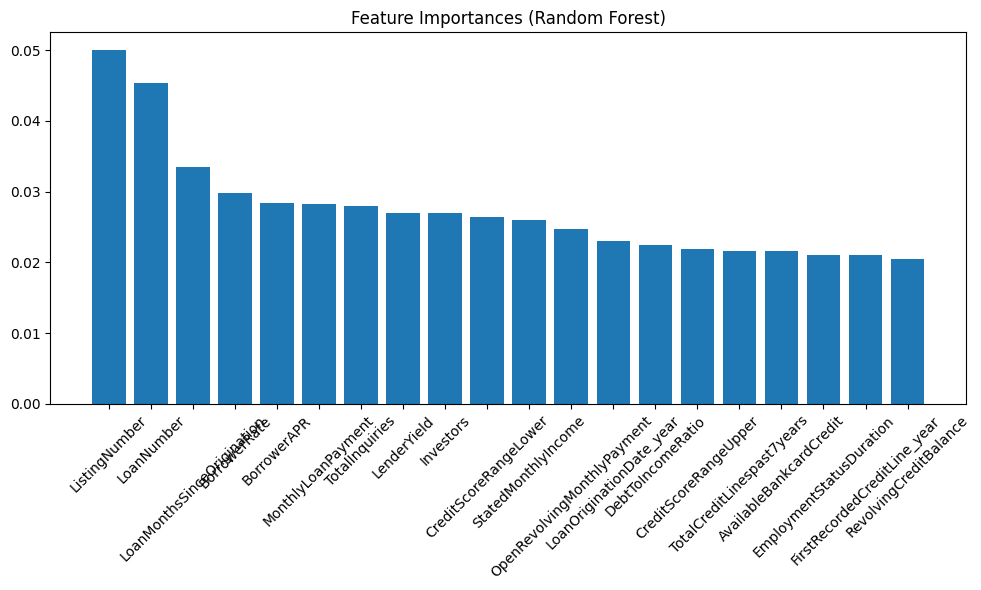

In [ ]:
exp.plot_rf_feature_importance(rf_model, X_train.columns, top_n=20)

## Local Explainability with LIME

We will now prepare the LIME explainer to interpret individual predictions.

For LIME, we need to:
1. Use the unscaled version of X_test because LIME explanations are more interpretable in the original feature space.
2. Ensure categorical and numerical features are correctly identified.

In [ ]:
lime_explainer = exp.get_lime_explainer(X_test_unscaled)
instance_idx = 10

### XGBoost

In [ ]:
exp.plot_lime_explanation(lime_explainer, X_test_unscaled, xgb_model, instance_idx=10)

### Logistic Regression

In [ ]:
exp.plot_lime_explanation(lime_explainer, X_test_unscaled, log_model, instance_idx=10)

### Random Forest

In [ ]:
exp.plot_lime_explanation(lime_explainer, X_test_unscaled, rf_model, instance_idx=10)

## Summary

We successfully applied SHAP and LIME to explain model predictions globally and locally for all three models:
- Logistic Regression
- Random Forest
- XGBoost

Next step: generalize this process into an audit pipeline that can automatically perform these steps given any model and dataset.
